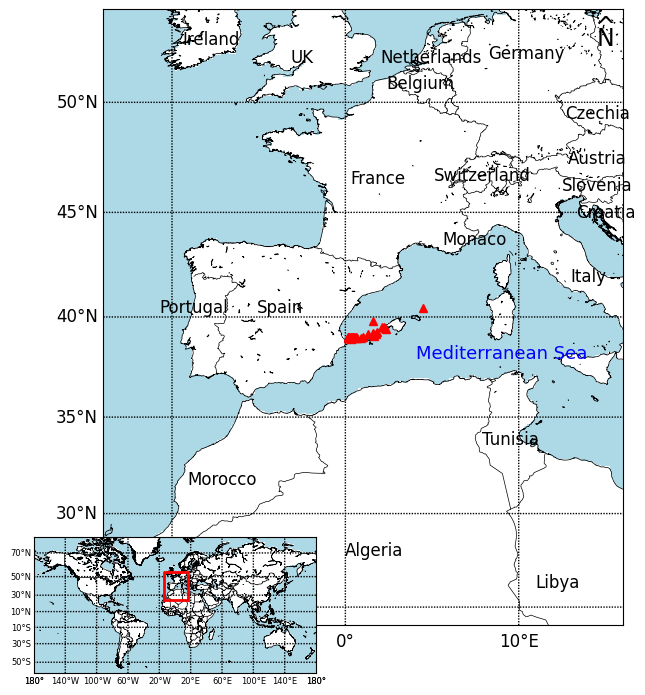

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

df = pd.read_csv(r"D:\MTP\DLR\mediterrean_sea\data_files\mediterranean_sea_dataset.csv")

poi_latitude = df['LATITUDE'].iloc[0]
poi_longitude = df['LONGITUDE'].iloc[0]

# size of the cropped image
crop_width = 30  
crop_height = 30 

# main figure
fig = plt.figure(figsize=(12, 8))

# Basemap instance for the main plot
m_main = Basemap(projection='mill', llcrnrlat=poi_latitude - crop_height / 2, urcrnrlat=poi_latitude + crop_height / 2,
                 llcrnrlon=poi_longitude - crop_width / 2, urcrnrlon=poi_longitude + crop_width / 2, resolution='f')

m_main.drawcoastlines(linewidth=0.5)
m_main.drawcountries(linewidth=0.5)
# m_main.drawmapboundary(fill_color='aqua')
m_main.drawparallels(range(-90, 91, 5),fontsize=12, labels=[1, 0, 0, 0])
m_main.drawmeridians(range(-180, 181, 10), fontsize=12,labels=[0, 0, 0, 1])
m_main.drawlsmask(land_color='white', ocean_color='lightblue', lakes=True)

# Convert latitude and longitude to map coordinates for the main plot
x_main, y_main = m_main(df['LONGITUDE'].values, df['LATITUDE'].values)

# points on the main plot
# m_main.plot(x_main, y_main, 'bo', label='All Points')
m_main.plot(x_main[::300], y_main[::300], 'r^', label='Every 500th Point')


country_coordinates = {
    'Italy': (42, 14),
    'Spain': (40.4637, -3.7492),
    'Portugal': (40.4637, -8.7492),
    'Ireland': (52.7637, -7.7492),
    'UK': (51.9637, -2.492),
    'Netherlands': (51.9503, 4.9517),
    'Germany': (52.1657, 10.4515),
    'France': (46.6035, 1.8883),
    'Tunisia': (33.8869, 9.5375),
    'Belgium': (50.8503, 4.3517),
    'Austria': (47.5162, 14.5501),
    'Slovenia': (46.25,14.5501),
    'Czechia': (49.5,14.5501),
    'Croatia': (45, 15),
    'Switzerland':(46.7384, 7.8883),
    'Monaco': (43.7384, 7.4246),
    'Algeria': (28.0339, 1.6596),
    'Morocco': (31.7917, -7.0926),
#     'Western Sahara': (22.2155, -10.8858),
    'Libya': (26.3351, 12.2283)
}

# Add country names
for country_code, (lat, lon) in country_coordinates.items():
    x, y = m_main(lon, lat)
    plt.text(x, y, country_code, fontsize=12, ha='center', va='center', color='black')

    
navigation = {
    '^': (53.3, 15),
    'N': (52.8, 15)
}
for code, (lat, lon) in navigation.items():
    x, y = m_main(lon, lat)
    plt.text(x, y, code, fontsize=17, ha='center', va='center', color='black')#,fontname='DejaVu Sans')

# supported_fonts = ['Arial', 'DejaVu Sans', 'Noto Sans', 'FreeSans']

    
sea_coordinates = {
    'Mediterranean Sea': (38.2, 9)
}
for name, (lat, lon) in sea_coordinates.items():
    x, y = m_main(lon, lat)
    plt.text(x, y, name, fontsize=13, ha='center', va='center', color='blue')

# a, b = m_main(37.6869, 9)
# plt.text(a,b, 'Mediterranean Sea', fontsize=12, ha='center', va='center', color='blue')

# c, d = m_main(53, 15)
# plt.text(c,d, '\u2B99', fontsize=14, ha='center', va='center', color='black')
# e,f = m_main(52.8, 15)
# plt.text(e,f, 'N', fontsize=14, ha='center', va='center', color='black')



# Create a Basemap instance for the inset (small) world map
# m_inset = Basemap(projection='robin', lon_0=0, llcrnrlat=-60, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180, resolution='c', ax=fig.add_axes([0, 0, 0.23, 0.23]))
m_inset = Basemap(projection='mill', llcrnrlat=-60, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180, resolution='l', ax=fig.add_axes([0.235, 0.05, 0.241, 0.17]))#0.238, 0.045, 0.241, 0.175


# Draw coastlines, countries, and oceans on the inset world map
m_inset.drawcoastlines(linewidth=0.5)
m_inset.drawcountries(linewidth=0.5)
m_inset.drawparallels(range(-90, 91, 20),fontsize=6, labels=[1,0, 0, 0])
m_inset.drawmeridians(range(-180, 181, 40), fontsize=6, labels=[0, 0, 0,1])#, rotation=90)
m_inset.drawlsmask(land_color='white', ocean_color='lightblue', lakes=True)


# rectangle
rectangle_corners = [(poi_latitude - crop_height / 2, poi_longitude - crop_width / 2), (poi_latitude - crop_height / 2, poi_longitude + crop_width / 2), (poi_latitude + crop_height / 2, poi_longitude + crop_width / 2), (poi_latitude + crop_height / 2, poi_longitude - crop_width / 2), (poi_latitude - crop_height / 2, poi_longitude - crop_width / 2)]
lats, lons = zip(*rectangle_corners, rectangle_corners[0])  
x, y = m_inset(lons, lats)
m_inset.plot(x, y, marker=None, color='red', linewidth=2)


# # savfig
# save_directory = r'D:\MTP\DLR\final_paper'
# file_name = 'med_plot.pdf'
# full_file_path = os.path.join(save_directory, file_name)

# plt.tight_layout()

# plt.savefig(full_file_path, dpi=500, bbox_inches='tight', pad_inches=0)
# # plt.savefig("output_plot.tif", format="tif", dpi=500)

# if os.path.exists(full_file_path):
#     print(f'Image saved successfully to {full_file_path}')
# else:
#     print('Image not saved.')

plt.show()

Image saved successfully to D:\MTP\DLR\final_paper\study_area.pdf


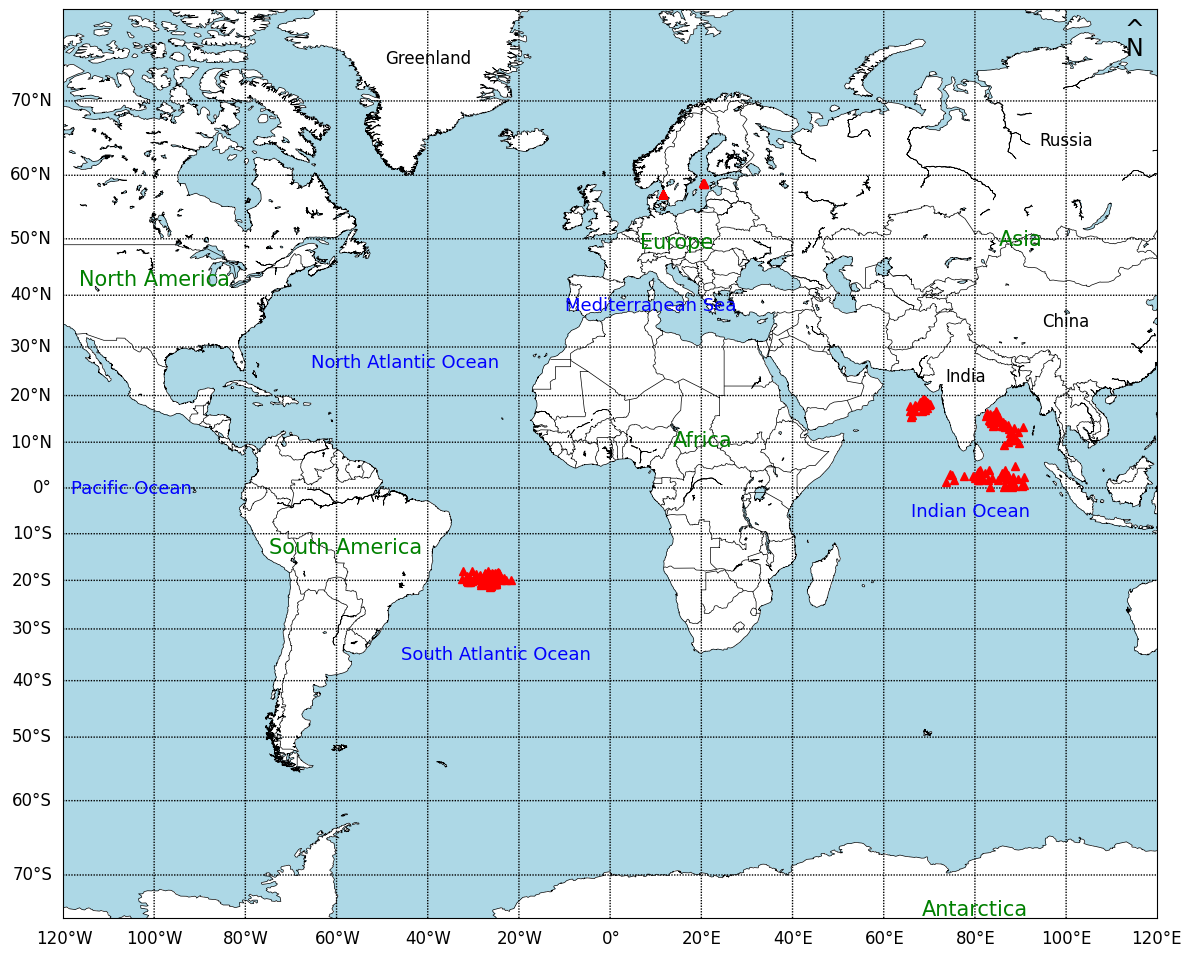

In [17]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

df = pd.read_csv(r"D:\MTP\DLR\mediterrean_sea\ipynb_files\lat_logcsv.csv")

poi_latitude = df['LATITUDE'].iloc[0]
poi_longitude = df['LONGITUDE'].iloc[0]

# size of the cropped image
crop_width = 160
crop_height = 160

# main figure
fig = plt.figure(figsize=(12, 20))

# Basemap instance for the main plot
m_main = Basemap(projection='mill', llcrnrlat=-75, urcrnrlat=80,
                 llcrnrlon=-120, urcrnrlon=120, resolution='l')

m_main.drawcoastlines(linewidth=0.5)
m_main.drawcountries(linewidth=0.5)
# m_main.drawmapboundary(fill_color='aqua')
m_main.drawparallels(range(-90, 91, 10),fontsize=12, labels=[1, 0, 0, 0])
m_main.drawmeridians(range(-180, 181, 20), fontsize=12,labels=[0, 0, 0, 1])
m_main.drawlsmask(land_color='white', ocean_color='lightblue', lakes=True)

# Convert latitude and longitude to map coordinates for the main plot
x_main, y_main = m_main(df['LONGITUDE'].values, df['LATITUDE'].values)

# points on the main plot
# m_main.plot(x_main, y_main, 'bo', label='All Points')
m_main.plot(x_main[::3], y_main[::3], 'r^', label='Every 500th Point')

country_coordinates = {
    'India': (24, 78),
    'China': (35, 100),
    'Russia': (65, 100),
    'Greenland': (75, -40),
#     'Germany': (52.1657, 10.4515),
#     'France': (46.6035, 1.8883),
#     'Argentina': (-33.8869, -70),
#     'Belgium': (50.8503, 4.3517),
#     'Austria': (47.5162, 14.5501),
#     'Slovenia': (46.25,14.5501),
#     'Croatia': (45, 15),
#     'Switzerland':(46.7384, 7.8883),
#     'Monaco': (43.7384, 7.4246),
#     'Algeria': (28.0339, 1.6596),
#     'Morocco': (31.7917, -7.0926),
#     'Western Sahara': (22.2155, -10.8858)
}

# Add country names
for country_code, (lat, lon) in country_coordinates.items():
    x, y = m_main(lon, lat)
    plt.text(x, y, country_code, fontsize=12, ha='center', va='center', color='black')

    
navigation = {
    '^': (78,115),
    'N': (76,115)
}
for code, (lat, lon) in navigation.items():
    x, y = m_main(lon, lat)
    plt.text(x, y, code, fontsize=17, ha='center', va='center', color='black')#,fontname='DejaVu Sans')

# supported_fonts = ['Arial', 'DejaVu Sans', 'Noto Sans', 'FreeSans']

    
sea_coordinates = {
    'Indian Ocean': (-5, 79),
    'Mediterranean Sea': (38.2, 9),
    'South Atlantic Ocean': (-35, -25),
    'North Atlantic Ocean': (27, -45),
    'Pacific Ocean': (0,-105)
}
for name, (lat, lon) in sea_coordinates.items():
    x, y = m_main(lon, lat)
    plt.text(x, y, name, fontsize=13, ha='center', va='center', color='blue')
    
    
    
continants_coordinates = {
    'North America': (43, -100),
    'South America': (-13, -58),
    'Europe': (49.5,14.5501),
    'Africa': (10.3351, 20.2283),
    'Asia' : (50,90),
    'Antarctica': (-74,80)
}
for name, (lat, lon) in continants_coordinates.items():
    x, y = m_main(lon, lat)
    plt.text(x, y, name, fontsize=15, ha='center', va='center', color='green')

# savfig
save_directory = r'D:\MTP\DLR\final_paper'
file_name = 'study_area.pdf'
full_file_path = os.path.join(save_directory, file_name)

plt.tight_layout()

plt.savefig(full_file_path, dpi=500, bbox_inches='tight', pad_inches=0)
# plt.savefig("output_plot.tif", format="tif", dpi=500)

if os.path.exists(full_file_path):
    print(f'Image saved successfully to {full_file_path}')
else:
    print('Image not saved.')

plt.show()


In [19]:
north_arrow_unicode = '\u2B99'

# Print the north arrow symbol
print(north_arrow_unicode)

⮙


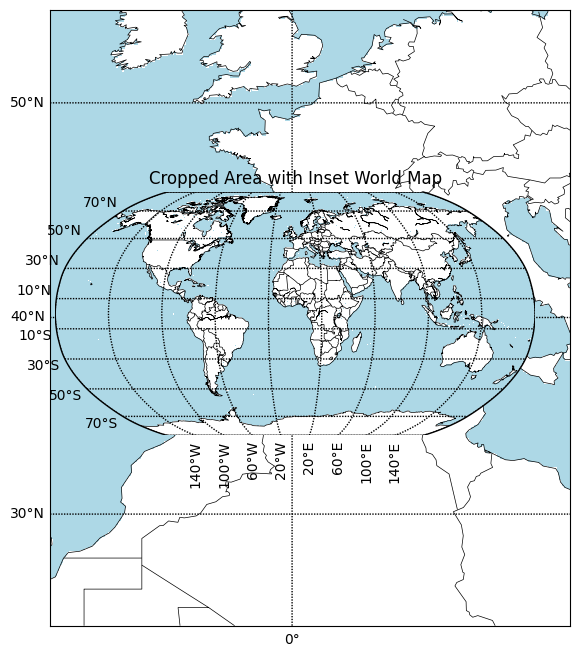

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Load CSV data into a DataFrame
df = pd.read_csv(r"D:\DLR\mediterranean_sea.csv")

# Extract latitude and longitude of the point of interest
poi_latitude = df['LATITUDE'].iloc[0]
poi_longitude = df['LONGITUDE'].iloc[0]

# Set the size of the cropped image
crop_width = 30  # Adjust the width of the crop box as needed
crop_height = 30  # Adjust the height of the crop box as needed

# Set up the main figure
fig = plt.figure(figsize=(12, 8))

# Create a Basemap instance for the main plot
m_main = Basemap(projection='mill', llcrnrlat=poi_latitude - crop_height / 2, urcrnrlat=poi_latitude + crop_height / 2,
                 llcrnrlon=poi_longitude - crop_width / 2, urcrnrlon=poi_longitude + crop_width / 2, resolution='l')

# Draw coastlines, countries, and oceans on the main plot
m_main.drawcoastlines(linewidth=0.5)
m_main.drawcountries(linewidth=0.5)
m_main.drawparallels(range(-90, 91, 10), labels=[1, 0, 0, 0])
m_main.drawmeridians(range(-180, 181, 20), labels=[0, 0, 0, 1])
m_main.drawlsmask(land_color='white', ocean_color='lightblue', lakes=True)

# Convert latitude and longitude to map coordinates for the main plot
x_main, y_main = m_main(df['LONGITUDE'].values, df['LATITUDE'].values)

# Plot all points on the main plot
m_main.plot(x_main, y_main, 'bo', label='All Points')

# Create a Basemap instance for the inset (small) world map
m_inset = Basemap(projection='robin', lon_0=0, llcrnrlat=-60, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180, resolution='c', ax=fig.add_axes([0.3, 0.3, 0.4, 0.4]))

# Draw coastlines, countries, and oceans on the inset world map
m_inset.drawcoastlines(linewidth=0.5)
m_inset.drawcountries(linewidth=0.5)
m_inset.drawparallels(range(-90, 91, 20), labels=[1, 0, 0, 0])
m_inset.drawlsmask(land_color='white', ocean_color='lightblue', lakes=True)

# Draw a rectangle on the inset world map to indicate the location of the cropped area
m_inset.plot(
    [poi_longitude - crop_width / 4, poi_longitude + crop_width / 4, poi_longitude + crop_width / 4, poi_longitude - crop_width / 4, poi_longitude - crop_width / 4],
    [poi_latitude - crop_height / 4, poi_latitude - crop_height / 4, poi_latitude + crop_height / 4, poi_latitude + crop_height / 4, poi_latitude - crop_height / 4],
    color='red', linestyle='--', linewidth=1)

# Draw meridians with rotated labels
meridians = range(-180, 181, 40)
m_inset.drawmeridians(meridians, labels=[0, 0, 0, 1], rotation=90)

# Customize the main plot
plt.title('Cropped Area with Inset World Map')

# Show the plot
plt.show()
